In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [147]:
file_path='E:/Metro2/raw_data//'
# file_path='E:/Metro2/artifacts//'
df=pd.read_csv(file_path+'Data.csv')

In [148]:
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)

In [149]:
display(HTML(f"<h2>Age and Gender</h2>"))

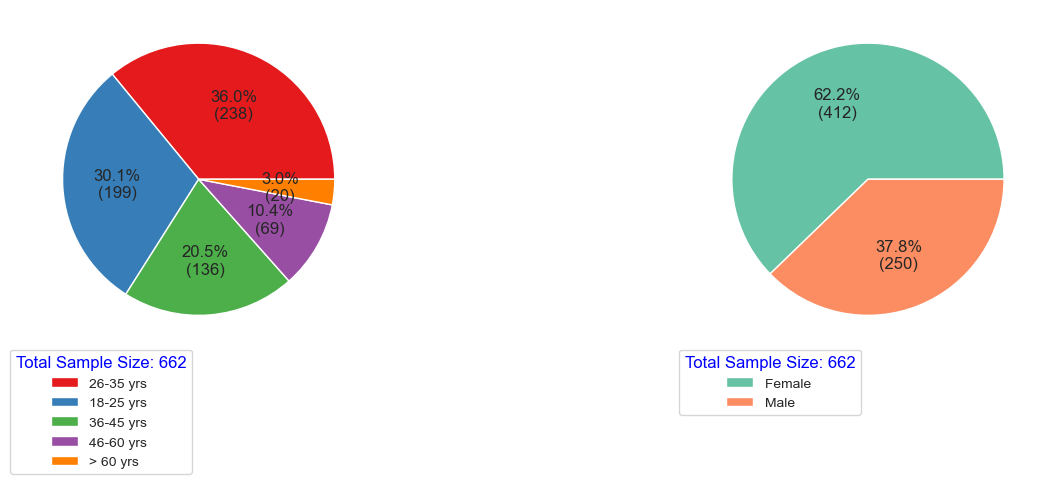

In [150]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['18'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['17'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['18'].value_counts()
age_counts.plot.pie(autopct=lambda pct: func(pct, age_counts), ax=ax[0], shadow=False, colors=colors_age, labels=None)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(age_labels, loc="best", bbox_to_anchor=(0.5, 0.02), fontsize='small', title=f"Total Sample Size: {df_size}")
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['17'].value_counts()
gender_counts.plot.pie(autopct=lambda pct: func(pct, gender_counts), ax=ax[1], shadow=False, colors=colors_gender, labels=None)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02), fontsize='small', title=f"Total Sample Size: {df_size}")
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [151]:
display(HTML(f"<h2>Education and occupation</h2>"))

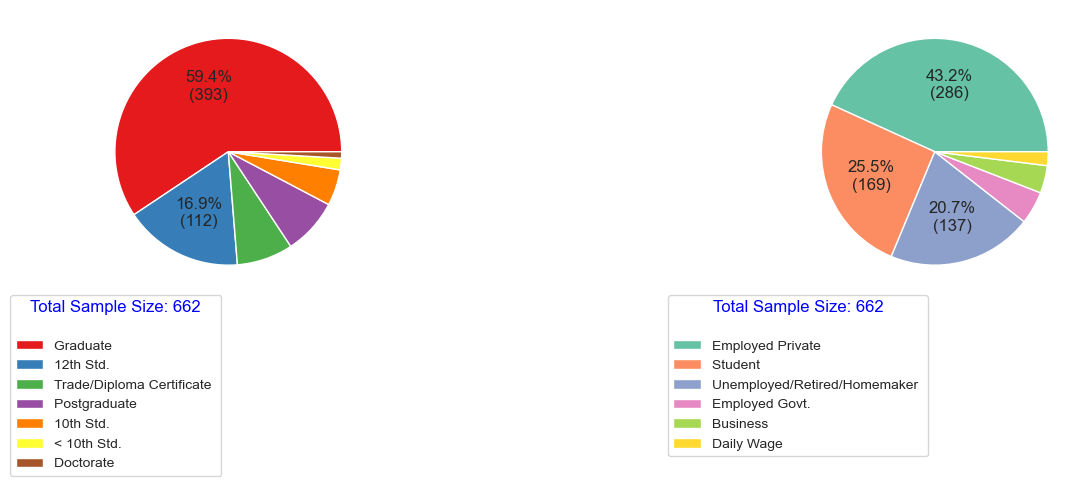

In [152]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['19'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['20'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['19'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['20'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [153]:
display(HTML(f"<h2>Income and Vehicle ownership</h2>"))

In [154]:
def convert_value(val):
    if val == '4+':
        return 4
    else:
        return int(val)

# Apply the conversion function to the columns
df['22b'] = df['22b'].apply(convert_value)
df['22c'] = df['22c'].apply(convert_value)
df['22d'] = df['22d'].apply(convert_value)

# Sum the values of the three columns to create the 'VEH' column
df['VEH'] = df[['22b', '22c', '22d']].sum(axis=1)

# Display the DataFrame


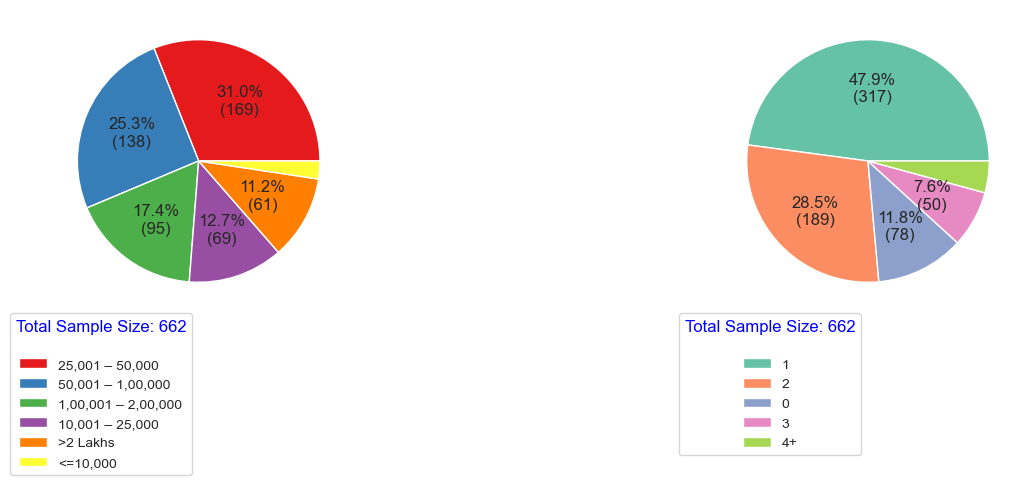

In [155]:
df['VEH'] = df['VEH'].apply(lambda x: '4+' if x >= 4 else str(x))

def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 5 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:5]

def get_top_indices2(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:4]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['21'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['VEH'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['21'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['VEH'].value_counts()
top_gender_indices = get_top_indices2(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()
